<a href="https://colab.research.google.com/github/SvetlanaShkryleva/image-processing/blob/main/Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузите изображение в оттенках серого sar_1_gray.jpg.
2. постройте гистограмму
3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
Для каждого решения - напечатайте результат

In [68]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [69]:
image = cv2.imread('sar_1_gray.jpg')

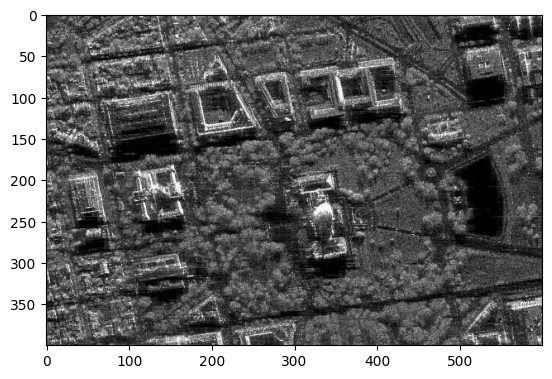

In [70]:
plt.imshow(image)

In [71]:
b = image[:,:,0]

In [72]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

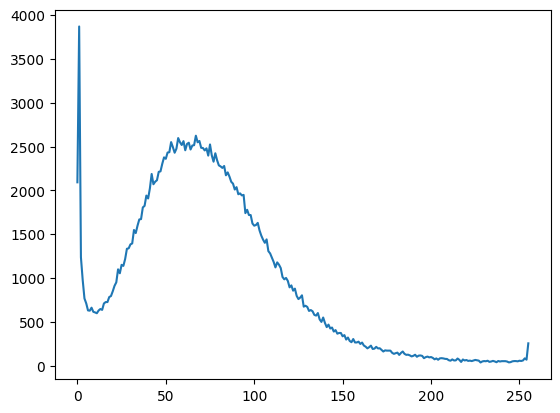

In [73]:
plt.plot(b_hist)

In [74]:
b_hist_cum = b_hist.cumsum()

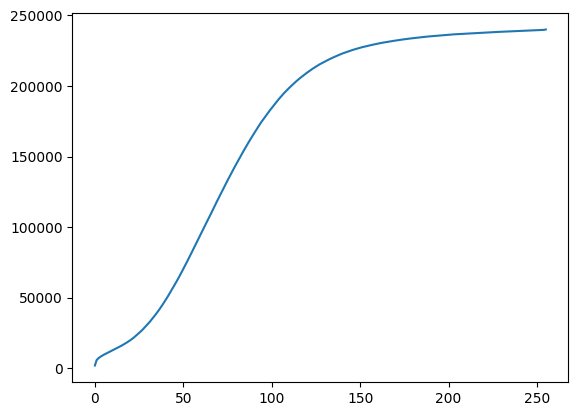

In [75]:
plt.plot(b_hist_cum)

In [76]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

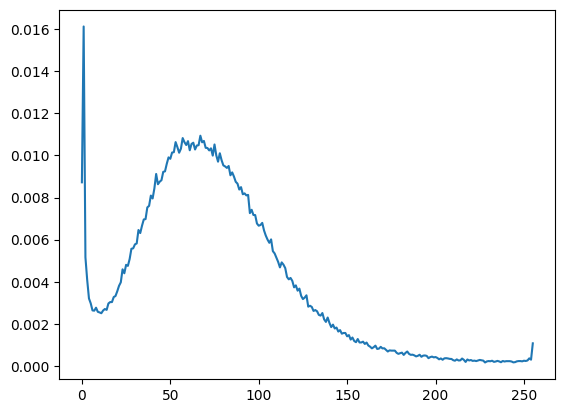

In [77]:
plt.plot(b_hist_norm)

In [78]:
gamma = 0.5

normalized = image / 255.0
corrected = np.power(normalized, gamma)
corrected_image_1 = (corrected * 255).astype(np.uint8)

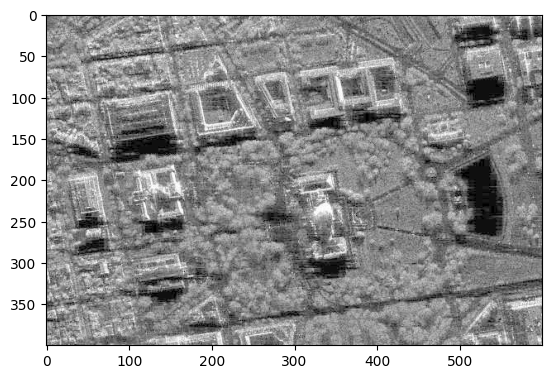

In [79]:
plt.imshow(corrected_image_1)

In [80]:
gamma = 2.2

normalized = image / 255.0
corrected = np.power(normalized, gamma)
corrected_image = (corrected * 255).astype(np.uint8)

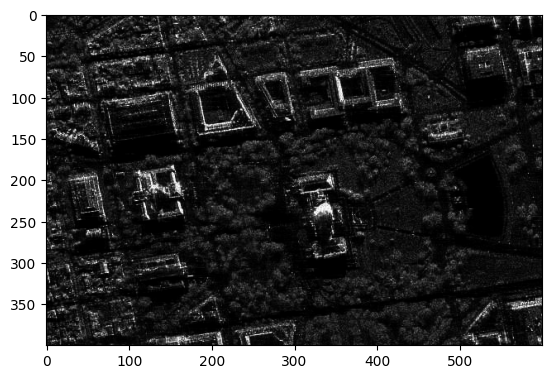

In [81]:
plt.imshow(corrected_image)

In [82]:
gray_original = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_corrected = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2GRAY)

In [83]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(gray_original, gray_corrected, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 0.43429325957963244


In [84]:
mse = mean_squared_error(gray_original, gray_corrected)
print(f"MSE: {mse}")

MSE: 2900.1336083333335


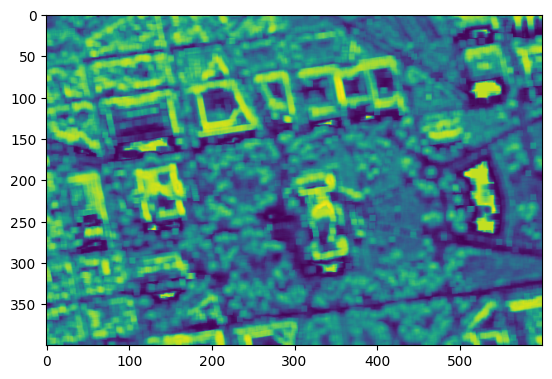

In [85]:
plt.imshow(diff)

In [86]:
mean = gray_original.mean()

In [87]:
std = gray_original.std()

In [88]:
print(mean,std)

74.9443875 43.383258327183974


In [89]:
eq_gray = cv2.equalizeHist(gray_original)

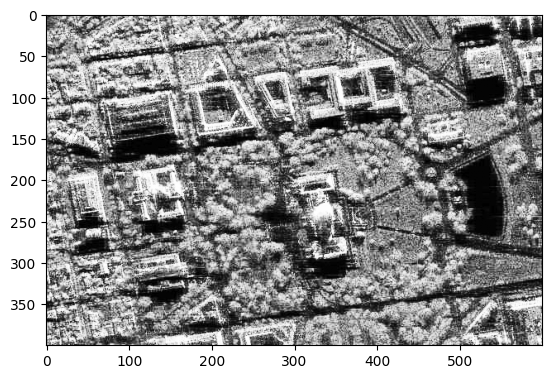

In [90]:
plt.imshow(eq_gray, cmap="gray")

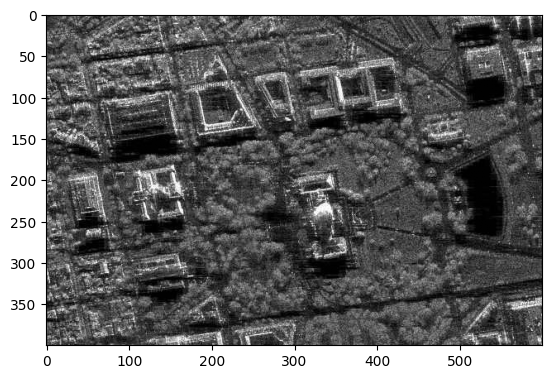

In [91]:
plt.imshow(gray_original, cmap="gray")

In [92]:
_,thresh1 = cv2.threshold(gray_original,200,255,cv2.THRESH_BINARY)

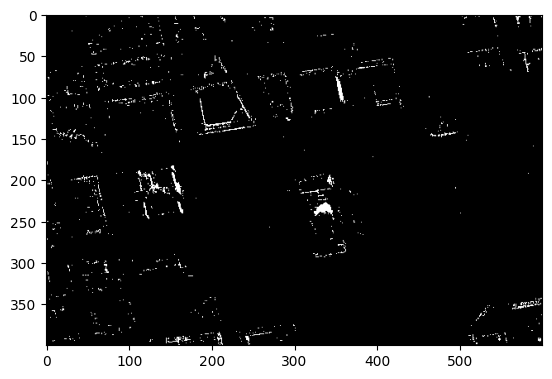

In [93]:
plt.imshow(thresh1, cmap='gray')

In [94]:
thresh1[thresh1==100].sum()

np.uint64(0)

In [95]:
_,thresh2 = cv2.threshold(gray_original,100,255,cv2.THRESH_BINARY)

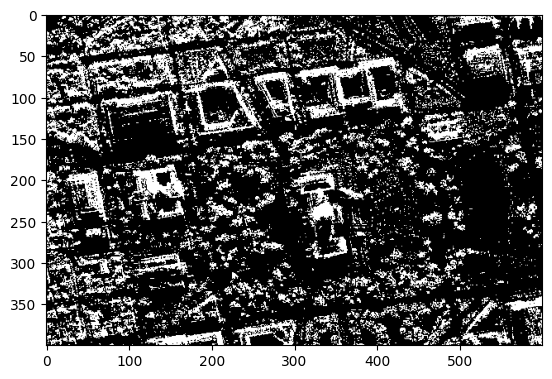

In [96]:
plt.imshow(thresh2, cmap='gray')

In [97]:
thresh2[thresh2==100].sum()

np.uint64(0)

In [98]:
_,thresh3 = cv2.threshold(gray_original,0,255,cv2.THRESH_BINARY)

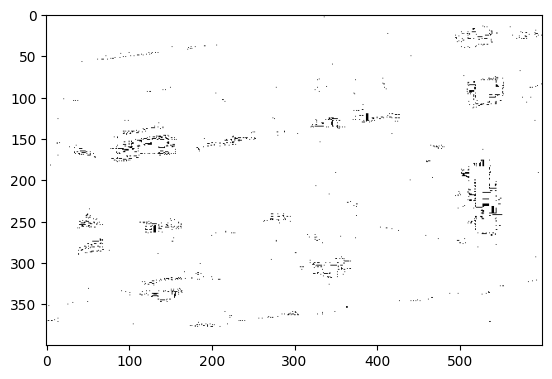

In [99]:
plt.imshow(thresh3, cmap='gray')

In [100]:
thresh3[thresh1==100].sum()

np.uint64(0)